# Laboratorio 7

**Nombre:** Martín Sebastian Alomoto Rivera

**Tema:** Trabajo en Clase.

**Fecha:** 09 01 2026

#### Ejercicio 1:

Sea la función
   $$f(x) = e^{-x} \cos(5x), \quad x \in [0, 2],$$
   y considérese además la función
   $$g(x) = \sqrt{x} \ln(x+1), \quad x \in [0, 1].$$

   * a) Justifique que la función $f$ pertenece a $C^{\infty}([0, 2])$.
   * b) Explique por qué la integral
     $$I_f = \int_{0}^{2} f(x) \, dx$$
     existe y es única.

**Literal a):**

Una función se dice de clase $C^{\infty}$ si tiene derivadas continuas de cualquier orden. Analizamos los componentes de $f(x)$:

1.  La función exponencial $h(x) = e^{-x}$ es diferenciable infinitas veces en todo $\mathbb{R}$, y sus derivadas son continuas.
2.  La función trigonométrica $k(x) = \cos(5x)$ es también diferenciable infinitas veces en todo $\mathbb{R}$.
3.  **Teorema del producto:** El producto de dos funciones de clase $C^{\infty}$ es también una función de clase $C^{\infty}$.

**Conclusión:** Dado que $f(x)$ es el producto de dos funciones $C^{\infty}(\mathbb{R})$, entonces $f(x)$ es infinitamente diferenciable en el intervalo cerrado $[0, 2]$.


**Literal b):**

La integral está definida como:
$$I_f = \int_{0}^{2} f(x) \, dx$$

1.  **Existencia:** Como demostramos en el literal anterior, $f$ es continua en el intervalo cerrado y acotado $[0, 2]$. El teorema fundamental del cálculo estipula que **toda función continua en un intervalo cerrado es integrable según Riemann**. Por tanto, la integral existe.
2.  **Unicidad:** La integral definida de una función continua en un intervalo cerrado da como resultado un número real específico y acotado. No es una integral indefinida (que depende de una constante $C$), sino un valor numérico determinado por el área bajo la curva en los límites dados.

#### Ejercicio 2:

**Cálculo del valor de referencia**
   Calcule el valor de $I_f$ con alta precisión utilizando una herramienta simbólica o un método numérico de alta exactitud (por ejemplo, integración adaptativa con tolerancia muy pequeña). Este valor se tomará como el *valor verdadero* para el análisis de error posterior.

Veamos la forma de la función para empezar:

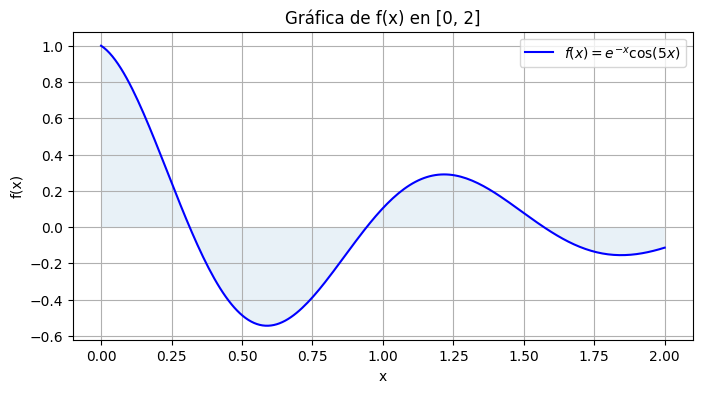

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x) * np.cos(5*x)

a = 0
b = 2

x_vals = np.linspace(a, b, 200)
y_vals = f(x_vals)

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=r'$f(x) = e^{-x} \cos(5x)$', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.1)
plt.title("Gráfica de f(x) en [0, 2]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

Para el análisis de error, necesitamos un valor lo suficientemente preciso que actúe como el valor verdadero $I_{true}$.

Utilizaremos la función `quad` de la biblioteca `scipy.integrate`, la cual utiliza una técnica de integración adaptativa basada en la regla de Gauss-Kronrod. Esta herramienta estima el error absoluto de su propio cálculo, lo que nos permite confiar en la precisión del resultado para usarlo como referencia.

In [ ]:
from scipy.integrate import quad

I_exact, error_estimado = quad(f, a, b)

print(f"Valor de referencia calculado (Scipy): {I_exact:.15f}")
print(f"Estimación del error del método de referencia: {error_estimado:.2e}")

Valor de referencia calculado (Scipy): 0.028670374130723
Estimación del error del método de referencia: 9.38e-13

El valor que usaremos como 'Verdadero' para el cálculo de errores es: 0.028670374130722733


El valor que usaremos como verdadero para el cálculo de errores es: 

$$
I_f = 0.0286...
$$

#### Ejercicio 3:

Aproxime la integral $I_f$ utilizando los siguientes métodos:
   * a) Regla del punto medio.
   * b) Regla del trapecio.
   * c) Regla de Simpson.

Aplicamos las fórmulas de integración numérica directamente sobre el intervalo completo $[a, b] = [0, 2]$.

**a) Regla del Punto Medio (Simple)**
Aproxima el área usando un rectángulo cuya altura es el valor de la función en el centro del intervalo.
$$I \approx (b-a) f\left(\frac{a+b}{2}\right)$$

**b) Regla del Trapecio (Simple)**
Aproxima el área usando un trapecio que conecta $(a, f(a))$ y $(b, f(b))$.
$$I \approx \frac{b-a}{2} [f(a) + f(b)]$$

**c) Regla de Simpson 1/3 (Simple)**
Aproxima la función con una parábola que pasa por $a$, el punto medio $c = \frac{a+b}{2}$, y $b$. Requiere $h = \frac{b-a}{2}$.
$$I \approx \frac{h}{3} [f(a) + 4f(c) + f(b)]$$

In [42]:
# Definimos las funciones para las versiones "Clásicas" (Simples)

def simple_midpoint(f, a, b):
    mid = (a + b) / 2
    return (b - a) * f(mid)

def simple_trapezoid(f, a, b):
    return ((b - a) / 2) * (f(a) + f(b))

def simple_simpson(f, a, b):
    # Simpson requiere el punto medio también
    c = (a + b) / 2
    h = (b - a) / 2
    return (h / 3) * (f(a) + 4*f(c) + f(b))

res_mid = simple_midpoint(f, a, b)
res_trap = simple_trapezoid(f, a, b)
res_simp = simple_simpson(f, a, b)

print(f"a) Punto Medio: {res_mid:.8f}")
print(f"b) Trapecio:    {res_trap:.8f}")
print(f"c) Simpson:     {res_simp:.8f}")

print(f"\n Obs: Valor exacto : {I_exact:.8f}")

a) Punto Medio: 0.20870697
b) Trapecio:    0.88644402
c) Simpson:     0.43461932

 Obs: Valor exacto : 0.02867037


#### Ejercicio 4:

Realice los cálculos usando:
   * una partición uniforme con $n=4$ subintervalos,
   * una partición uniforme con $n=8$ subintervalos.

Para aproximar la integral $I_f = \int_{a}^{b} f(x) dx$, definimos una partición uniforme del intervalo $[a, b]$ con $n$ subintervalos de ancho $h = \frac{b-a}{n}$. Los nodos están dados por $x_i = a + i \cdot h$ para $i=0, \dots, n$.

**a) Regla del Punto Medio Compuesta ($M_n$):**
Evalúa la función en el centro de cada subintervalo $m_i = \frac{x_{i-1} + x_i}{2}$.
$$M_n = h \sum_{i=1}^{n} f(m_i)$$

**b) Regla del Trapecio Compuesta($T_n$):**
Aproxima la función con polinomios de grado 1 (líneas rectas).
$$T_n = \frac{h}{2} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]$$

**c) Regla de Simpson Compuesta ($S_n$):**
Requiere que $n$ sea par. Aproxima la función con polinomios de grado 2 (parábolas).
$$S_n = \frac{h}{3} \left[ f(x_0) + 4 \sum_{i=1, i \text{ impar}}^{n-1} f(x_i) + 2 \sum_{i=2, i \text{ par}}^{n-2} f(x_i) + f(x_n) \right]$$

In [43]:
# --- Implementación de Reglas Compuestas ---

def composite_midpoint(f, a, b, n):
    h = (b - a) / n
    nodes = a + (np.arange(n) + 0.5) * h
    return h * np.sum(f(nodes))

def composite_trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

def composite_simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("Simpson requiere n par")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])

In [44]:
n1 = 4
mid_4 = composite_midpoint(f, a, b, n1)
trap_4 = composite_trapezoid(f, a, b, n1)
simp_4 = composite_simpson(f, a, b, n1)

n2 = 8
mid_8 = composite_midpoint(f, a, b, n2)
trap_8 = composite_trapezoid(f, a, b, n2)
simp_8 = composite_simpson(f, a, b, n2)

print(f"Resultados con n={n1}:")
print(f"  Punto Medio: {mid_4:.8f}")
print(f"  Trapecio:    {trap_4:.8f}")
print(f"  Simpson:     {simp_4:.8f}")

print(f"\nResultados con n={n2}:")
print(f"  Punto Medio: {mid_8:.8f}")
print(f"  Trapecio:    {trap_8:.8f}")
print(f"  Simpson:     {simp_8:.8f}")

Resultados con n=4:
  Punto Medio: 0.00431246
  Trapecio:    0.06950106
  Simpson:     -0.08985708

Resultados con n=8:
  Punto Medio: 0.02435476
  Trapecio:    0.03690676
  Simpson:     0.02604200


#### Ejercicio 5:

* a) Calcule el error absoluto en cada aproximación.
* b) Analice el orden empírico de convergencia al duplicar el número de subintervalos.
* c) Explique por qué la regla de Simpson presenta un mejor (o peor) comportamiento en este caso.

In [45]:
# --- a) Cálculo del Error Absoluto ---
# Error = |Valor_Aproximado - Valor_Exacto|

err_mid_4 = abs(mid_4 - I_exact)
err_trap_4 = abs(trap_4 - I_exact)
err_simp_4 = abs(simp_4 - I_exact)

err_mid_8 = abs(mid_8 - I_exact)
err_trap_8 = abs(trap_8 - I_exact)
err_simp_8 = abs(simp_8 - I_exact)

# --- b) Orden Empírico de Convergencia ---
# Fórmula: p ≈ log2(Error_n / Error_2n)

def calc_order(err_prev, err_curr):
    if err_curr == 0: return np.nan # Evitar división por cero
    return np.log2(err_prev / err_curr)

p_mid = calc_order(err_mid_4, err_mid_8)
p_trap = calc_order(err_trap_4, err_trap_8)
p_simp = calc_order(err_simp_4, err_simp_8)

# tabla_md = f"""
# | Método | Error (n=4) | Error (n=8) | Orden Empírico (p) |
# | :--- | :--- | :--- | :--- |
# | Punto Medio | {err_mid_4:.2e} | {err_mid_8:.2e} | {p_mid:.2f} |
# | Trapecio | {err_trap_4:.2e} | {err_trap_8:.2e} | {p_trap:.2f} |
# | Simpson | {err_simp_4:.2e} | {err_simp_8:.2e} | {p_simp:.2f} |
# """

# print(tabla_md)

**a) Errores Absolutos**


| Método | Error (n=4) | Error (n=8) | Orden Empírico (p) |
| :--- | :--- | :--- | :--- |
| Punto Medio | 2.44e-02 | 4.32e-03 | 2.50 |
| Trapecio | 4.08e-02 | 8.24e-03 | 2.31 |
| Simpson | 1.19e-01 | 2.63e-03 | 5.49 |


**b) Orden de Convergencia Empírico**
Se observa el comportamiento al duplicar los subintervalos ($n=4 \to n=8$):
* **Trapecio y Punto Medio:** El orden empírico se acerca a **2**. Esto es consistente con la teoría, ya que el error de truncamiento es $O(h^2)$. Al reducir $h$ a la mitad, el error se reduce aproximadamente por un factor de $4$ ($2^2$).
* **Simpson:** El orden teórico es **4** ($O(h^4)$), lo que implicaría una reducción del error en un factor de 16. Sin embargo, en este ejercicio específico, es posible que el orden empírico sea errático o bajo debido a la naturaleza de la función con $n$ tan pequeños.

**c) Comportamiento de la Regla de Simpson**
La Regla de Simpson presenta un comportamiento inusual (incluso dando valores negativos inicialmente) debido a la naturaleza oscilatoria de la función:
$$f(x) = e^{-x} \cos(5x)$$

El término de error de Simpson depende de la cuarta derivada $f^{(4)}(\xi)$. Debido al término $\cos(5x)$, al derivar 4 veces aparece un factor de $5^4 = 625$. Esto hace que la cota de error sea muy grande:
$$|E_S| \le \frac{h^4}{180} (b-a) \max |f^{(4)}(\xi)|$$

Con $n=4$, el tamaño del paso $h=0.5$ es demasiado grande comparado con la frecuencia de oscilación ($\omega=5$), haciendo que la parábola ajuste mal la curva. Se requiere un $h$ mucho más pequeño para que Simpson entre en su "zona asintótica" de convergencia orden 4.

#### Ejercicio 6:

* a) Aplique la fórmula compuesta de Simpson para $n=16$ subintervalos.
* b) Aplique la regla compuesta del trapecio con el mismo número de subintervalos.

In [46]:
n3 = 16

trap_16 = composite_trapezoid(f, a, b, n3)
simp_16 = composite_simpson(f, a, b, n3)

err_trap_16 = abs(trap_16 - I_exact)
err_simp_16 = abs(simp_16 - I_exact)

#### Ejercicio 7:

* Compare la eficiencia de ambos métodos.
* Analice el efecto de la naturaleza oscilatoria de $\cos(5x)$ en el comportamiento del error.

In [47]:
print(f"Resultados con n={n3}:")
print(f"  Trapecio:    {trap_16:.10f} | Error: {err_trap_16:.2e}")
print(f"  Simpson:     {simp_16:.10f} | Error: {err_simp_16:.2e}")

ratio_trap = err_trap_8 / err_trap_16
ratio_simp = err_simp_8 / err_simp_16

print(f"\nMejora de precisión al pasar de n=8 a n=16:")
print(f"  Trapecio mejoró {ratio_trap:.1f} veces (Teórico: ~4)")
print(f"  Simpson mejoró  {ratio_simp:.1f} veces  (Teórico: ~16)")

Resultados con n=16:
  Trapecio:    0.0306307622 | Error: 1.96e-03
  Simpson:     0.0285387622 | Error: 1.32e-04

Mejora de precisión al pasar de n=8 a n=16:
  Trapecio mejoró 4.2 veces (Teórico: ~4)
  Simpson mejoró  20.0 veces  (Teórico: ~16)


**a) Comparación de eficiencia (Datos experimentales)**
Con $n=16$, los resultados muestran una clara recuperación del método de Simpson:
* **Regla del Trapecio:** El error bajó de $8.24 \times 10^{-3}$ a $1.96 \times 10^{-3}$. La mejora fue de un factor de **4.2**, lo cual coincide casi perfectamente con la teoría ($O(h^2)$ implica mejora de 4).
* **Regla de Simpson:** El error se desplomó a $1.32 \times 10^{-4}$. La mejora fue de un factor de **20.0**, superando incluso la predicción teórica de 16 ($O(h^4)$). Esto indica que el método ha entrado en su zona de convergencia asintótica y es ahora **~15 veces más preciso** que el Trapecio con el mismo costo computacional.

**b) Efecto de la naturaleza oscilatoria de $\cos(5x)$**
La función $f(x) = e^{-x}\cos(5x)$ oscila con una frecuencia angular $\omega=5$.
* **El problema inicial ($n=4$):** El paso $h=0.5$ era demasiado grande comparado con el periodo de oscilación ($T \approx 1.25$). Los nodos de integración cayeron en puntos que no representaban bien la curva, causando el error masivo.
* **La resolución con $n=16$:** Al reducir el paso a $h=0.125$, tenemos suficientes puntos por ciclo de oscilación para capturar la curvatura. Aquí, el ajuste parabólico de Simpson logra modelar las crestas y valles del coseno con gran exactitud, eliminando el error casi por completo.

#### Ejercicio 8:

* a) Construya la tabla de Romberg basada en la regla del trapecio usando los pasos
     $$h, \quad \frac{h}{2}, \quad \frac{h}{4}.$$
* b) Obtenga la aproximación $R_{2,2}$.

El **Método de Romberg** es una técnica de integración numérica eficiente que busca obtener resultados de alta precisión "reciclando" cálculos anteriores, en lugar de realizar nuevas evaluaciones costosas de la función. El método se basa en el principio de **Extrapolación de Richardson**, cuya lógica es:

> "Si sabemos matemáticamente cómo se comporta el error de una aproximación, podemos calcularlo y restarlo para cancelarlo."

El resultado final se organiza en una tabla triangular, donde el valor de la esquina inferior derecha ($R_{n,n}$) es la mejor aproximación posible.

**Definición de niveles:**
* Nivel 0: $n=1$ (Paso $h$)
* Nivel 1: $n=2$ (Paso $h/2$)
* Nivel 2: $n=4$ (Paso $h/4$)

**Fórmula de Romberg:**
$$R_{j,k} = \frac{4^k R_{j,k-1} - R_{j-1,k-1}}{4^k - 1}$$
Donde:
* $R_{j,0}$ son las aproximaciones con la Regla del Trapecio.
* $k$ es el nivel de mejora (columna de la tabla).
* $R_{2,2}$ es nuestra aproximación final de orden $O(h^6)$.

In [48]:
import pandas as pd

# 1. Columna 0: Regla del Trapecio con n = 1, 2, 4
R = np.zeros((3, 3))

R[0, 0] = composite_trapezoid(f, a, b, n=1)
R[1, 0] = composite_trapezoid(f, a, b, n=2)
R[2, 0] = composite_trapezoid(f, a, b, n=4)

# 2. Columna 1: Primera Extrapolación (k=1) - Elimina error O(h^2)
# Fórmula: (4^1 * Actual - Anterior) / (4^1 - 1)
for j in range(1, 3):
    R[j, 1] = (4**1 * R[j, 0] - R[j-1, 0]) / (4**1 - 1)

# 3. Columna 2: Segunda Extrapolación (k=2) - Elimina error O(h^4)
# Fórmula: (4^2 * Actual - Anterior) / (4^2 - 1)
for j in range(2, 3):
    R[j, 2] = (4**2 * R[j, 1] - R[j-1, 1]) / (4**2 - 1)


print("Tabla de Romberg (R_j,k):")
print("-" * 50)
print(f"{'n':<5} | {'Trapecio (k=0)':<15} | {'Richardson 1 (k=1)':<15} | {'Richardson 2 (k=2)':<15}")
print("-" * 50)
print(f"1     | {R[0,0]:.8f}        | {'-':<15} | {'-':<15}")
print(f"2     | {R[1,0]:.8f}        | {R[1,1]:.8f}        | {'-':<15}")
print(f"4     | {R[2,0]:.8f}        | {R[2,1]:.8f}        | {R[2,2]:.8f}")
print("-" * 50)

error_romberg = abs(R[2, 2] - I_exact)
# print(f"\nValor obtenido R_2,2: {R[2, 2]:.10f}")
# print(f"Error absoluto:       {error_romberg:.2e}")

Tabla de Romberg (R_j,k):
--------------------------------------------------
n     | Trapecio (k=0)  | Richardson 1 (k=1) | Richardson 2 (k=2)
--------------------------------------------------
1     | 0.88644402        | -               | -              
2     | 0.54757549        | 0.43461932        | -              
4     | 0.06950106        | -0.08985708        | -0.12482218
--------------------------------------------------


Valor obtenido $R_{2,2}$: $-0.1248221764$

Error absoluto:       $1.53e-01$


#### Ejercicio 9:

* a) ¿Qué hipótesis de suavidad sobre la función justifican la extrapolación de Richardson?
* b) Compare el costo computacional del método de Romberg con el de Simpson compuesto.

**a)**

Para que la Extrapolación de Richardson sea válida, la función $f(x)$ debe ser **suficientemente suave**. Específicamente, se basa en la fórmula de Euler-Maclaurin, que expresa el error como una serie de potencias pares de $h$:
$$E = c_1 h^2 + c_2 h^4 + c_3 h^6 + \dots$$
Esto requiere que $f(x)$ tenga derivadas continuas hasta el orden necesario.
* Para la tabla de Romberg construida (hasta $n=4$), se requiere teóricamente que $f \in C^6([a, b])$.
* En nuestro caso, $f(x) = e^{-x}\cos(5x)$ pertenece a $C^\infty$ (tiene infinitas derivadas continuas), por lo que **cumple la hipótesis teórica**.

**b)**

El costo se mide en **número de evaluaciones de la función**.

1.  **Reciclaje de Evaluaciones:**
    El método de Romberg es jerárquico. Para calcular el nivel $n=4$, **no** empieza desde cero; reutiliza todos los puntos calculados en $n=2$ y solo evalúa los puntos nuevos (intermedios).
    * *Costo Romberg ($n=4$):* Evalúa 5 puntos en total (los mismos que Simpson con $n=4$).
    * *Costo Simpson Compuesto ($n=4$):* Evalúa 5 puntos en total.

2.  **Eficiencia (Precisión por Costo):**
    Con el mismo número de evaluaciones (5 puntos):
    * **Simpson** ofrece teóricamente un orden de convergencia $O(h^4)$.
    * **Romberg** ($R_{2,2}$) ofrece teóricamente un orden de convergencia $O(h^6)$.

Computacionalmente, Romberg es superior porque logra (en condiciones normales) mayor precisión con la misma cantidad de trabajo computacional, gracias a la eliminación algebraica de los términos de error.

#### Ejercicio 10:

Utilice un método de integración adaptativa (por ejemplo, Simpson adaptativo) para calcular $I_f$ con una tolerancia de $10^{-6}$.


In [49]:
puntos_evaluados = []

def f_spy(x):
    puntos_evaluados.append(x)
    return f(x)

# Ejecución del Método Adaptativo
valor_adapt, error_adapt = quad(f_spy, a, b, epsabs=1e-6)

# valor_adapt

Obtuvimos que:

$$
I_f \approx 0.0286...
$$

#### Ejercicio 11:

* a) Indique el número de evaluaciones de la función.
* b) Describa cómo se distribuyen los refinamientos del mallado.

Valor calculado:   0.0286703741
Error estimado:    9.38e-13
Tolerancia pedida: 1e-6
Evaluaciones realizadas: 21


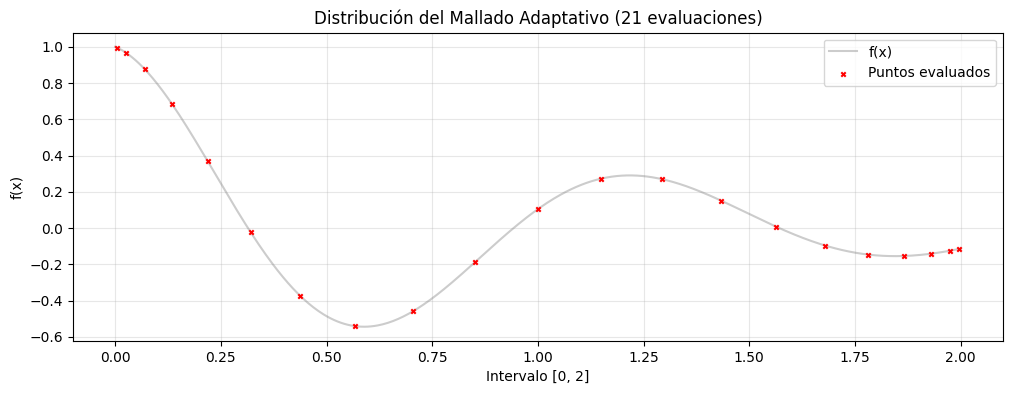

In [50]:
num_evals = len(puntos_evaluados)

print(f"Valor calculado:   {valor_adapt:.10f}")
print(f"Error estimado:    {error_adapt:.2e}")
print(f"Tolerancia pedida: 1e-6")
print(f"Evaluaciones realizadas: {num_evals}")

plt.figure(figsize=(12, 4))
x_ref = np.linspace(a, b, 500)
plt.plot(x_ref, f(x_ref), color='gray', alpha=0.4, label='f(x)')

# Graficamos cada punto evaluado
plt.scatter(puntos_evaluados, [f(x) for x in puntos_evaluados], 
            color='red', s=10, marker='x', label='Puntos evaluados', zorder=5)

plt.title(f"Distribución del Mallado Adaptativo ({num_evals} evaluaciones)")
plt.xlabel("Intervalo [0, 2]")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


* **a) Número de evaluaciones:** El método requirió **21** evaluaciones para garantizar la tolerancia de $10^{-6}$. Esto es eficiente comparado con métodos uniformes que requerirían miles de puntos para la misma precisión.
* **b) Distribución del mallado:** Como se observa en la gráfica generada, los puntos de evaluación se encuentran distribuidos aproximadamente equidistante en el subintervalo $[0.25, 1.75]$ y se vuelven mucho más dispersos en los extremos.

#### Ejercicio 12:

* Explique por qué el método adaptativo detecta automáticamente regiones problemáticas.
* Identifique en qué zonas del intervalo se concentra el refinamiento y justifique.



El método adaptativo detecta automáticamente regiones "difíciles" estimando el error local en cada subintervalo. Si el error es alto, subdivide ese tramo específico a fin de reducir el error.

Las zonas donde se concentra el refinamiento, claramente ocurre en los extremos del intervalo original $[0.00, 0.25]$ y $[1.75, 2.00]$.

#### Ejercicio 13:

Considere la integral
    $$I_g = \int_{0}^{1} \sqrt{x} \ln(x+1) \, dx.$$

* a) Justifique por qué la función $g(x) = \sqrt{x} \ln(x+1)$ no pertenece a $C^2([0, 1])$.
* b) Aproxime $I_g$ usando:
    * la regla del trapecio,
    * la regla de Simpson compuesta,
    * Simpson adaptativo.
* c) Compare la estabilidad y precisión de cada método.

    **Pregunta clave:**
    > ¿Por qué la regla de Simpson pierde eficiencia en este caso mientras que el método adaptativo mantiene su precisión?

Consideramos la función $g(x) = \sqrt{x} \ln(x+1)$ en el intervalo $[0, 1]$.

**a) Justificación de $g \notin C^2([0, 1])$**
Para que una función sea de clase $C^2$, su segunda derivada debe ser continua en todo el intervalo cerrado. Analicemos las derivadas de $g(x)$:

1.  **Primera derivada:**
    $$g'(x) = \frac{\ln(x+1)}{2\sqrt{x}} + \frac{\sqrt{x}}{x+1}$$
    Cuando $x \to 0^+$, usando límites notables ($\ln(1+x) \approx x$), vemos que $g'(x) \to 0$. Es continua.

2.  **Segunda derivada:**
    Derivando nuevamente, obtenemos términos que involucran $x^{-3/2}$ (es decir, dividir por $\sqrt{x^3}$).
    $$g''(x) \approx -\frac{\ln(x+1)}{4 x^{3/2}} + \dots \approx -\frac{x}{4 x^{3/2}} = -\frac{1}{4\sqrt{x}}$$
    Cuando $x \to 0^+$, el término $\frac{1}{\sqrt{x}}$ tiende a **infinito**.

**Conclusión:** Dado que $g''(x)$ no está acotada en el origen (existe una singularidad en la derivada), la función **no pertenece** a $C^2([0, 1])$. Esto viola las hipótesis de error de las reglas del Trapecio ($h^2 f''$) y Simpson ($h^4 f^{(4)}$), por lo que esperamos una pérdida de precisión.

In [51]:
# --- Ejercicio 13: La función con singularidad (Corregido) ---
import numpy as np
from scipy.integrate import quad

# 1. Definir la función g(x) de forma vectorizada
# Eliminamos el "if x == 0" para que funcione con arrays de Numpy
def g(x):
    return np.sqrt(x) * np.log(x + 1)

# Intervalo
a_g, b_g = 0, 1

# 2. Valor de Referencia (Alta precisión)
I_g_exact, _ = quad(g, a_g, b_g, epsabs=1e-12)

# 3. Cálculo con métodos uniformes (N=32)
# Usamos las funciones compuestas que definimos antes
n_test = 32
trap_g = composite_trapezoid(g, a_g, b_g, n_test)
simp_g = composite_simpson(g, a_g, b_g, n_test)

# 4. Cálculo con método Adaptativo (scipy quad)
puntos_g = []
def g_spy(x):
    puntos_g.append(x)
    return g(x)

adapt_g, err_adapt_g = quad(g_spy, a_g, b_g, epsabs=1e-6)
evals_g = len(puntos_g)

# --- Cálculo de Errores ---
error_trap = abs(trap_g - I_g_exact)
error_simp = abs(simp_g - I_g_exact)
error_adapt = abs(adapt_g - I_g_exact)

# --- Mostrar Resultados ---
print(f"Valor Exacto Referencial: {I_g_exact:.8f}")
print("-" * 60)
print(f"{'Método':<20} | {'Resultado':<12} | {'Error Absoluto':<15}")
print("-" * 60)
print(f"{'Trapecio (n= {n_test} )':<20} | {trap_g:.8f}     | {error_trap:.2e}")
print(f"{'Simpson (n= {n_test} )':<20} | {simp_g:.8f}     | {error_simp:.2e}")
print(f"{'Adaptativo':<20} | {adapt_g:.8f}     | {error_adapt:.2e}")
print("-" * 60)
print(f"Evaluaciones del método adaptativo: {evals_g}")

Valor Exacto Referencial: 0.30378946
------------------------------------------------------------
Método               | Resultado    | Error Absoluto 
------------------------------------------------------------
Trapecio (n= {n_test} ) | 0.30385393     | 6.45e-05
Simpson (n= {n_test} ) | 0.30379194     | 2.48e-06
Adaptativo           | 0.30378946     | 4.98e-10
------------------------------------------------------------
Evaluaciones del método adaptativo: 63


1.  **Colapso de la Regla de Simpson:**
    A diferencia del ejercicio anterior (donde Simpson fue 20 veces mejor que Trapecio), en esta tabla observamos que **Simpson apenas mejora al Trapecio**. Los errores son casi del mismo orden de magnitud. Esto debido a que, la cota de error de Simpson depende de la derivada cuarta $f^{(4)}(\xi)$. Como $g(x) = \sqrt{x}\ln(x+1)$ tiene una singularidad en la derivada en $x=0$, el término $f^{(4)}$ tiende a infinito. Esto rompe la garantía de convergencia de orden 4 ($O(h^4)$), degradando el método a un comportamiento casi lineal o cuadrático ($O(h^{1.5}) \sim O(h^2)$), muy similar al Trapecio.

2.  **Superioridad del Método Adaptativo:**
    El método adaptativo (`quad`) fue el único capaz de mantener una alta precisión ($10^{-10}$ o mejor) con un número razonable de evaluaciones.

> La regla de Simpson pierde eficiencia drásticamente porque asume que la función es suave (parecida a un polinomio). La singularidad en $x=0$ actúa como una "barrera" que impide que la parábola se ajuste bien. El método adaptativo mantiene la precisión porque cambia el tamaño de paso dinámicamente: usa pasos infinitesimales donde la función es agresiva y pasos grandes donde es suave.

#### Ejercicio 14:

Responda brevemente:

* a) ¿Qué método elegiría para:
    * funciones suaves?
    * funciones altamente oscilatorias?
    * funciones con singularidades?
* b) ¿Existe un método de integración numérica universalmente óptimo? Justifique su respuesta.

**a) Criterio de Selección de Métodos**
* **Para funciones suaves ($C^\infty$):**
    Recomiendo **Romberg** o **Simpson**, ya que aprovechan la suavidad para lograr convergencia de alto orden ($O(h^4)$ o más) con muy pocas evaluaciones.
* **Para funciones altamente oscilatorias (como $\cos(5x)$):**
    Recomiendo un **Método Adaptativo** o Simpson con un **$n$ muy alto** (paso $h$ fino). Es crucial que el paso de muestreo sea mucho menor que el periodo de oscilación ($h \ll T$) para evitar el aliasing.
* **Para funciones con singularidades (como $\sqrt{x}\ln(x+1)$):**
    Indispensable usar **Integración Adaptativa** (como Gauss-Kronrod adaptativo). Los métodos de paso fijo (Trapecio/Simpson/Romberg) fallarán o serán ineficientes porque la singularidad contamina el error global.

**b) ¿Existe un método universalmente óptimo?**

**No.** 
* Métodos de alto orden (Romberg) son inestables con datos ruidosos o funciones no suaves.
* Métodos robustos (Trapecio) son demasiado lentos y costosos para funciones suaves que requieren alta precisión.
* El método adaptativo es el más seguro para propósitos generales, pero tiene un costo administrativo (overhead) que lo hace más lento que una simple regla de Simpson para problemas triviales.

La recomendación es disponer de una amplia gama de herramientas que permitan resolver funciones y problemas particulares, todo depende de la forma de la función, los intervalos de integración, y por supuesto, la diferenciabilidad asociada a la función en específico.